In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os, sys, glob

#https://stackoverflow.com/questions/45662253/can-i-run-keras-model-on-gpu


###
### INIT VARIABLES
###

# Base folder
DATA_FOLDER = 'E:\\TFM_MUESTRAS\\' 

# Name of the test folder
TEST_FOLDER = "Test_004\\"

# Folder with city folders images
TRAINING_DIR = DATA_FOLDER + TEST_FOLDER + "images\\" 

# New folder to be created with joined images
PROCESS_NAME = 'process_001' 
EJECUTION_NAME = 'salamanca_prediction'

NEW_TRAINING_FOLDER = DATA_FOLDER + TEST_FOLDER + 'training_' + PROCESS_NAME
NEW_VALIDATION_FOLDER = DATA_FOLDER + TEST_FOLDER + 'validation_' + PROCESS_NAME



### PROCESS

batch_size = 50
image_size = 224 #150

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	NEW_TRAINING_FOLDER,
	target_size=(image_size,image_size),
	class_mode='categorical',
  batch_size=batch_size,
  shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
	NEW_VALIDATION_FOLDER,
	target_size=(image_size,image_size),
	class_mode='categorical',
  batch_size=batch_size,
  shuffle=True
)


model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(200, (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),#, input_shape=(image_size, image_size, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # input_shape=(image_size, image_size, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),

      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(4, activation='softmax')
  ])


model.summary()


from tensorflow.keras.utils import to_categorical

print (NEW_TRAINING_FOLDER)
print (NEW_VALIDATION_FOLDER)
training_files = glob.glob(NEW_TRAINING_FOLDER+"\\*\\*.tif")
validation_files = glob.glob(NEW_VALIDATION_FOLDER+"\\*\\*.tif")


total_count_training =len(training_files)
total_count_validation =len(validation_files)

print (total_count_training ,total_count_validation )


steps_per_epoch = total_count_training//batch_size
validation_steps = total_count_validation//batch_size 
print("Validation steps:", validation_steps)
print("Steps per epoch: ", steps_per_epoch)


model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='ADAM',#tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
    )


history = model.fit(
    train_generator, 
    epochs=1000, 
    steps_per_epoch=50, 
    validation_data=validation_generator, 
    verbose=1, 
    validation_steps=30
    )

model.save("rps_"+PROCESS_NAME+EJECUTION_NAME+".h5")



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4678466053674047926
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6864646144
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9454265953375475612
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'E:\\TFM_MUESTRAS\\Test_004\\training_process_001'

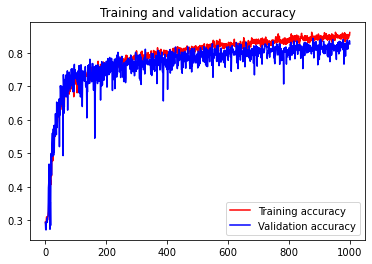

<Figure size 432x288 with 0 Axes>

In [ ]:

# Mostrar grafico
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

E:\TFM_MUESTRAS\Test_003\muestras_maestras\Valencia-61192cda1504_0.tif
[[0. 0. 0. 1.]]
<class 'numpy.ndarray'>
[0.0, 0.0, 0.0, 1.0]
Clase:  3  ---  4_formal
E:\TFM_MUESTRAS\Test_003\muestras_maestras\Valencia-61192eff5fa_0.tif
[[0. 1. 0. 0.]]
<class 'numpy.ndarray'>
[0.0, 1.0, 0.0, 0.0]
Clase:  1  ---  1_industrial
E:\TFM_MUESTRAS\Test_003\muestras_maestras\Valencia-611928751acc_2.tif
[[0. 0. 0. 1.]]
<class 'numpy.ndarray'>
[0.0, 0.0, 0.0, 1.0]
Clase:  3  ---  4_formal
E:\TFM_MUESTRAS\Test_003\muestras_maestras\Valencia-611929607f7_2.tif
[[0. 0. 0. 1.]]
<class 'numpy.ndarray'>
[0.0, 0.0, 0.0, 1.0]
Clase:  3  ---  4_formal
E:\TFM_MUESTRAS\Test_003\muestras_maestras\Valencia-61192a125b3_1.tif
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.7878028e-14]]
<class 'numpy.ndarray'>
[0.0, 1.0, 0.0, 2.787802778068168e-14]
Clase:  1  ---  1_industrial
E:\TFM_MUESTRAS\Test_003\muestras_maestras\Valencia-61192a13139c_1.tif
[[0. 1. 0. 0.]]
<class 'numpy.ndarray'>
[0.0, 1.0, 0.0, 0.0]
Clase:  1  ---  

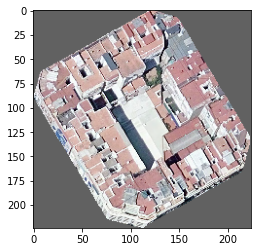

In [ ]:

import numpy as np
from keras.preprocessing import image
from IPython.display import Image 

builtup_names = ["0_espacioabierto", "1_industrial", "2_atomistic","4_formal"]
base_dir = "E:\TFM_MUESTRAS\Test_003\muestras_maestras"
to_test = [
  base_dir+"\\Valencia-61192cda1504_0.tif",
  base_dir+"\\Valencia-61192eff5fa_0.tif",
  base_dir+"\\Valencia-611928751acc_2.tif",
  base_dir+"\\Valencia-611929607f7_2.tif",
  base_dir+"\\Valencia-61192a125b3_1.tif",
  base_dir+"\\Valencia-61192a13139c_1.tif",
  base_dir+"\\Valencia-61192dd51504_4.tif",
  base_dir+"\\Valencia-61192e3b1cd3_4.tif"
]
#to_test = ["E:\\Atlas_Datos\\test_data\\trainingAll\\tempSample-60a5d3a41b89_4.tif"]
#to_test = ["E:\\Atlas_Datos\\test_data\\trainingAll\\tempSample-60a5d3b51189_0.tif"]
for fn in to_test:
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(image_size, image_size))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  print(type(classes))
  classes_list = classes.tolist()[0]
  print (classes_list)
  max_index = classes_list.index(max(classes_list))
  print("Clase: ", max_index, " --- ", builtup_names[max_index])
  #print(img)
  
  from matplotlib.pyplot import imshow
  imshow(np.asarray(img))



In [20]:
# Prediction
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
model = tf.keras.models.load_model('D:\\Dropbox\\TFM_UrbanAtlas\\desarrollo\\rps_process_003M05_1000e_80b_224i_ADAM.h5')

NEW_VALIDATION_FOLDER = "E:\\TFM_MUESTRAS\\Test_004\\Vlc_all"


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1234670807684466645
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6864646144
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9155808587885245715
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [21]:
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os, sys, glob

batch_size = 50
image_size = 224
builtup_names = ["0_espacioabierto", "1_industrial", "2_atomistic","4_formal"]

my_validation_datagen = ImageDataGenerator(rescale = 1./255)
my_validation_generator = my_validation_datagen.flow_from_directory(
	NEW_VALIDATION_FOLDER,
	target_size=(image_size, image_size),
	class_mode='categorical',
  batch_size=batch_size,
  shuffle=False
)

Y_pred = model.predict(my_validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(my_validation_generator.classes, y_pred))
print('Classification Report')
# list(train_generator.class_indices.keys())
target_names = []
for key in builtup_names:
    target_names.append(key)

print(classification_report(my_validation_generator.classes, y_pred, target_names=target_names))

Found 10412 images belonging to 1 classes.
Confusion Matrix
[[1094 1974 3048 4296]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]]
Classification Report
                  precision    recall  f1-score   support

0_espacioabierto       1.00      0.11      0.19     10412
    1_industrial       0.00      0.00      0.00         0
     2_atomistic       0.00      0.00      0.00         0
        4_formal       0.00      0.00      0.00         0

        accuracy                           0.11     10412
       macro avg       0.25      0.03      0.05     10412
    weighted avg       1.00      0.11      0.19     10412



C:\Users\oskmo\.conda\envs\masterall\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oskmo\.conda\envs\masterall\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oskmo\.conda\envs\masterall\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(len(y_pred))
validation_files = glob.glob(NEW_VALIDATION_FOLDER+"\\*\\*.tif")
print(len(validation_files))
builtup_numbers = [0,1,2,4]
import csv

with open('ok_valencia_prediction_2.csv', 'w', newline='') as csvfile:
    prediction_writer = csv.writer(csvfile, delimiter=';',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    prediction_writer.writerow(['MANZ', 'TYPE_PRED'])
    for imgIndex in range(0, len(validation_files)):
        path = validation_files[imgIndex]
        pred = y_pred[imgIndex]
        
        split = path.replace(".tif","").split("_")
        #print (split[-1], builtup_numbers[max_index])
        prediction_writer.writerow([split[-1], builtup_numbers[pred]])


10412
10412
